# Version information

In [1]:
from datetime import date
print("Running date:", date.today().strftime("%B %d, %Y"))
import pyleecan
print("Pyleecan version:" + pyleecan.__version__)
import SciDataTool
print("SciDataTool version:" + SciDataTool.__version__)

Running date: April 11, 2022
Pyleecan version:1.3.7
SciDataTool version:1.4.24


# 동작점 설정 방법
이 튜토리얼에서는 OPdq, InputCurrent 및 VarLoadCurrent 개체를 사용하여 Id/Iq 또는 I0/Phi0을 설정하여 여러 작동 지점에서 자기 시뮬레이션을 실행하는 방법을 설명합니다.

이 튜토리얼을 검증하는 데 사용된 참조 자료는 Z. Yang, M. Krishnamurthy 및 I. P. Brown, "전체 토크 속도 범위에 걸친 IPM의 전자기 및 진동 특성", 2013 International Electric Machines & Drives Conference, Chicago, IL, 2013, pp 295-302, doi: 10.1109/IEMDC.2013.6556267.

## 기계 및 시뮬레이션 정의
이 튜토리얼은 "[기계를 정의하는 방법](https://pyleecan.org/tuto_Machine.html)" 튜토리얼에 정의된 Toyota_Prius(2004) 기계를 사용합니다. 자기 모듈은 "[FEMM을 호출하는 시뮬레이션을 정의하는 방법](https://pyleecan.org/tuto_Simulation_FEMM.html)" 자습서의 대칭 모듈과 동일합니다.

<IPython.core.display.Javascript object>


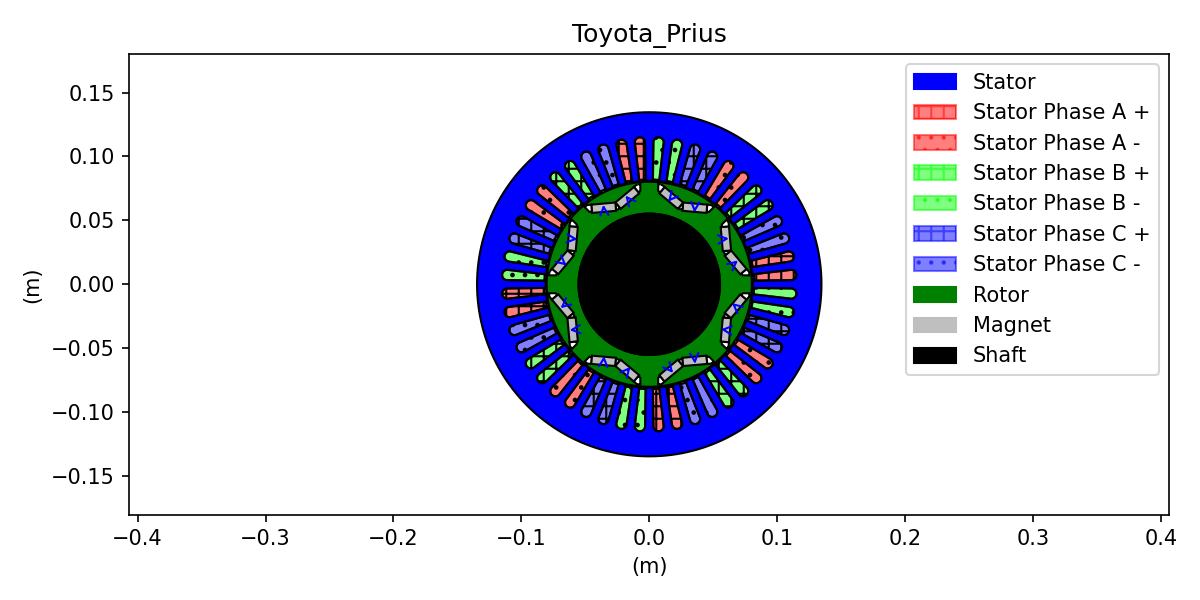

In [2]:
%matplotlib notebook

# Load the machine
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
from os.path import join

Toyota_Prius = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
Toyota_Prius.plot()

In [30]:
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.MagFEMM import MagFEMM
# Initialization of the Simulation
simu_op = Simu1(name="tuto_Id_Iq", machine=Toyota_Prius)

# Definition of the magnetic simulation (FEMM with symmetry and sliding band)
simu_op.mag = MagFEMM(
    type_BH_stator=0,
    type_BH_rotor=0,
    is_periodicity_a=True,
    is_periodicity_t=True,
    nb_worker=16,
    Kgeo_fineness=1,
)
# Run only Magnetic module
simu_op.elec = None
simu_op.force = None
simu_op.struct = None

## Id/Iq로 동작점 정의하기

InputCurrent 개체를 사용하면 Electrical 모듈의 출력과 Magnetic 모듈의 입력에 해당하는 "OutElec" 개체를 만들 수 있습니다. 이 예에서 작동 지점은 Id_ref 및 Iq_ref로 정의된 사인파 전류로 시작점을 정의하기 위해 OPdq 개체로 설정됩니다.

"[FEMM을 호출하는 시뮬레이션을 정의하는 방법](https://pyleecan.org/tuto_Simulation_FEMM.html)" 자습서는 동일한 InputCurrent 개체를 사용하여 Is를 직접 설정하여 전류를 적용합니다.

In [10]:
from pyleecan.Classes.InputCurrent import InputCurrent
from pyleecan.Classes.OPdq import OPdq
from numpy import sqrt, exp,pi

# Definition of a sinusoidal current
simu_op.input = InputCurrent()
# I0, Phi0 to set
I0_rms = 250/sqrt(2) # Maximum current [Arms]
Phi0 = 140*pi/180  # Maximum Torque Per Amp
# Compute corresponding Id/Iq
Id_ref = (I0_rms*exp(1j*Phi0)).real # [Arms] 
Iq_ref = (I0_rms*exp(1j*Phi0)).imag # [Arms] 
# Setting the values
simu_op.input.OP = OPdq(Id_ref=Id_ref, Iq_ref=Iq_ref)

(Id_ref,Iq_ref)

(-135.4188051049254, 113.62986941801093)

전류 및 자기 계산을 위한 이산화는 시간 및 각도("[FEMM을 호출하는 시뮬레이션을 정의하는 방법](https://pyleecan.org/tuto_Simulation_FEMM.html)" 자습서에서와 같이) 또는 설정을 통해 설정할 수 있습니다. 다음 매개변수:

In [11]:
simu_op.input.Nt_tot = 128 # Number of time step
simu_op.input.Na_tot = 2048 # Spatial discretization
simu_op.input.OP.N0 = 2000 # Rotor speed [rpm]

Nt_tot가 정의되면 시간 벡터는 자동으로 다음과 같이 설정됩니다.

     linspace(0, 60 / N0 * Nrev, Nt_tot)

Nrev로 로터의 회전 수(기본값은 1)

Na_tot가 정의되면 각도 벡터는 자동으로 다음과 같이 설정됩니다.

     linspace(0, 2*pi, Na_tot)

이제 입력이 완전히 정의되었으며 시뮬레이션을 실행할 수 있습니다.

In [12]:
from pyleecan.Functions.Plot import dict_2D

out_op = simu_op.run()

[23:39:46] Starting running simulation tuto_Id_Iq (machine=Toyota_Prius)
[23:39:46] Starting Magnetic module
[23:39:47] Solving time step 5 / 16 in FEMM
[23:39:47] Solving time step 1 / 16 in FEMM
[23:39:47] Solving time step 13 / 16 in FEMM
[23:39:47] Solving time step 9 / 16 in FEMM
[23:39:47] Solving time step 6 / 16 in FEMM
[23:39:47] Solving time step 2 / 16 in FEMM
[23:39:47] Solving time step 14 / 16 in FEMM
[23:39:48] Solving time step 10 / 16 in FEMM
[23:39:48] Solving time step 7 / 16 in FEMM
[23:39:48] Solving time step 3 / 16 in FEMM
[23:39:48] Solving time step 15 / 16 in FEMM
[23:39:48] Solving time step 11 / 16 in FEMM
[23:39:48] Solving time step 8 / 16 in FEMM
[23:39:48] Solving time step 4 / 16 in FEMM
[23:39:48] Solving time step 16 / 16 in FEMM
[23:39:48] Solving time step 12 / 16 in FEMM
[23:39:49] End of simulation tuto_Id_Iq


<IPython.core.display.Javascript object>


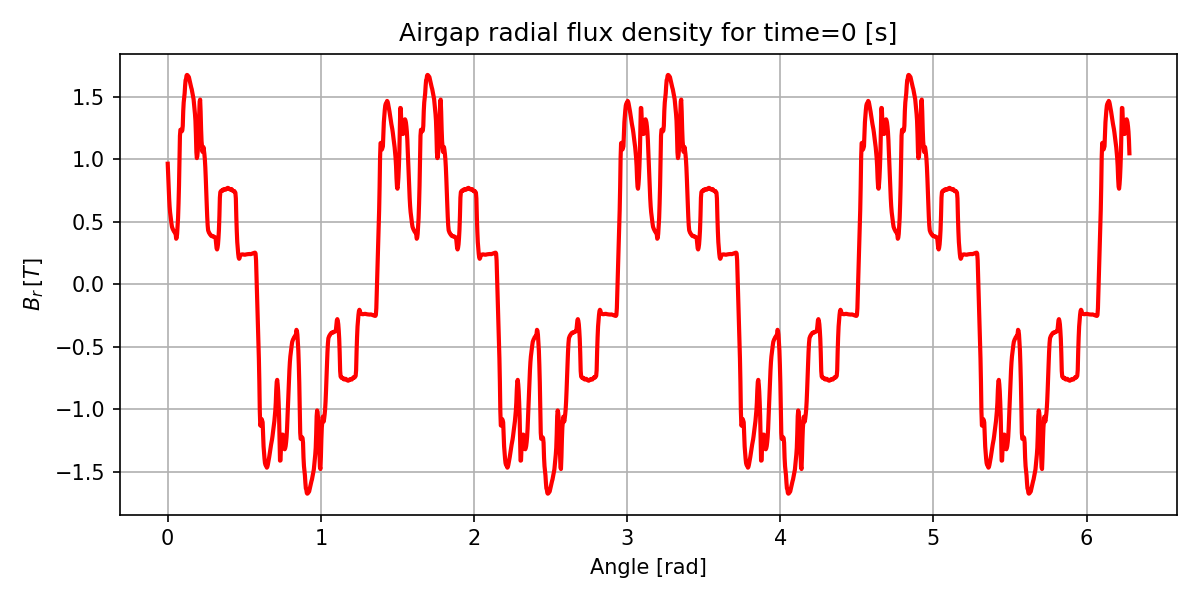

<IPython.core.display.Javascript object>


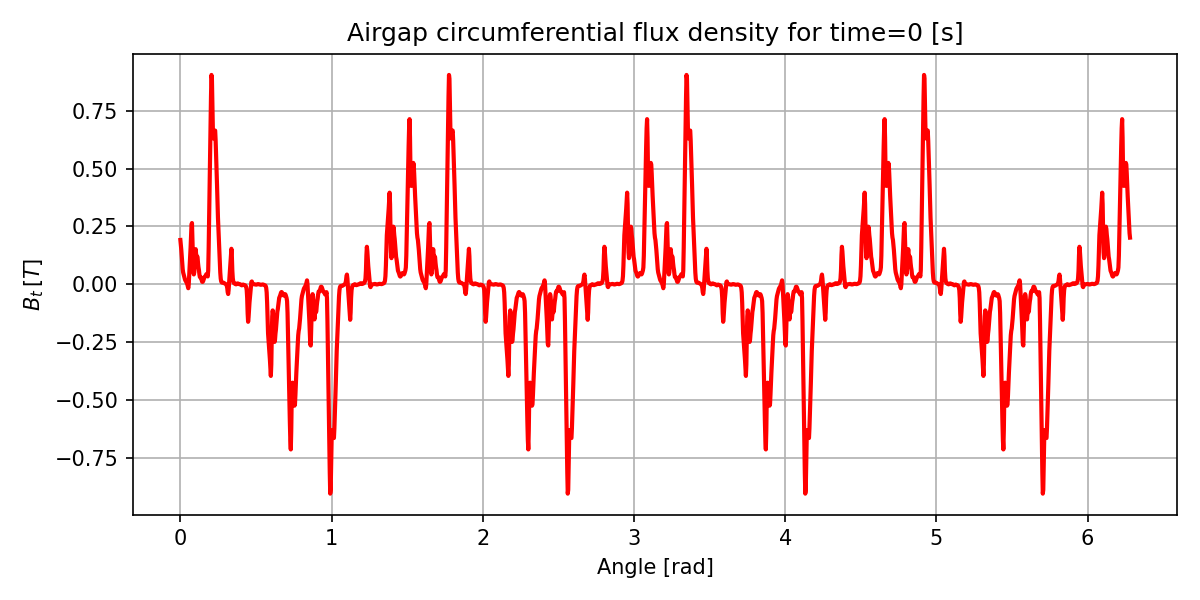

<IPython.core.display.Javascript object>


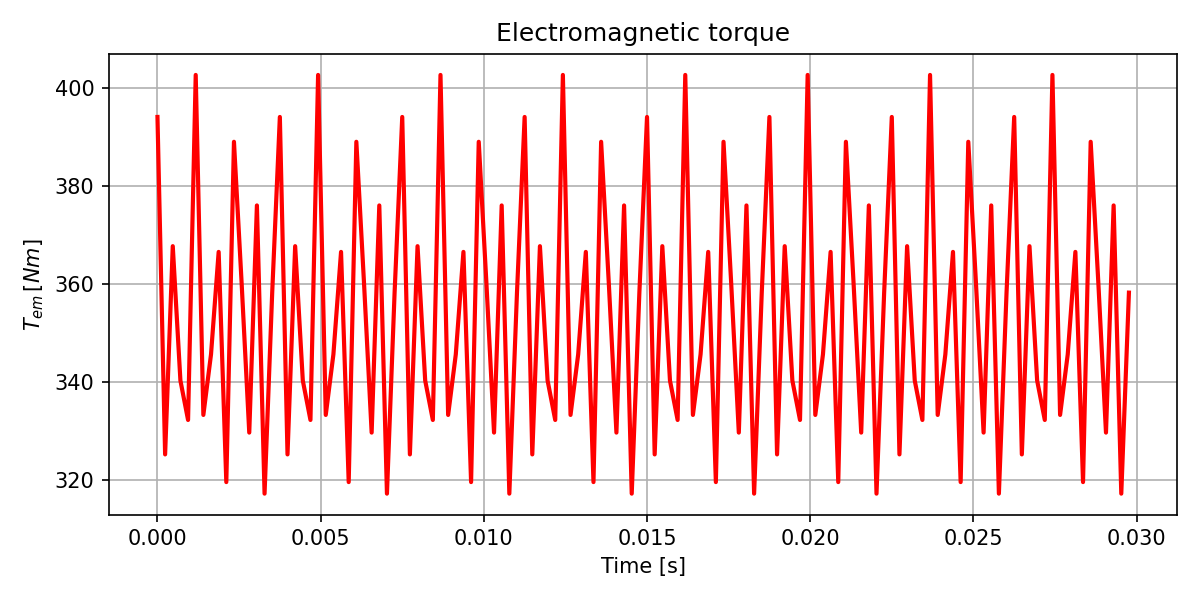

<IPython.core.display.Javascript object>


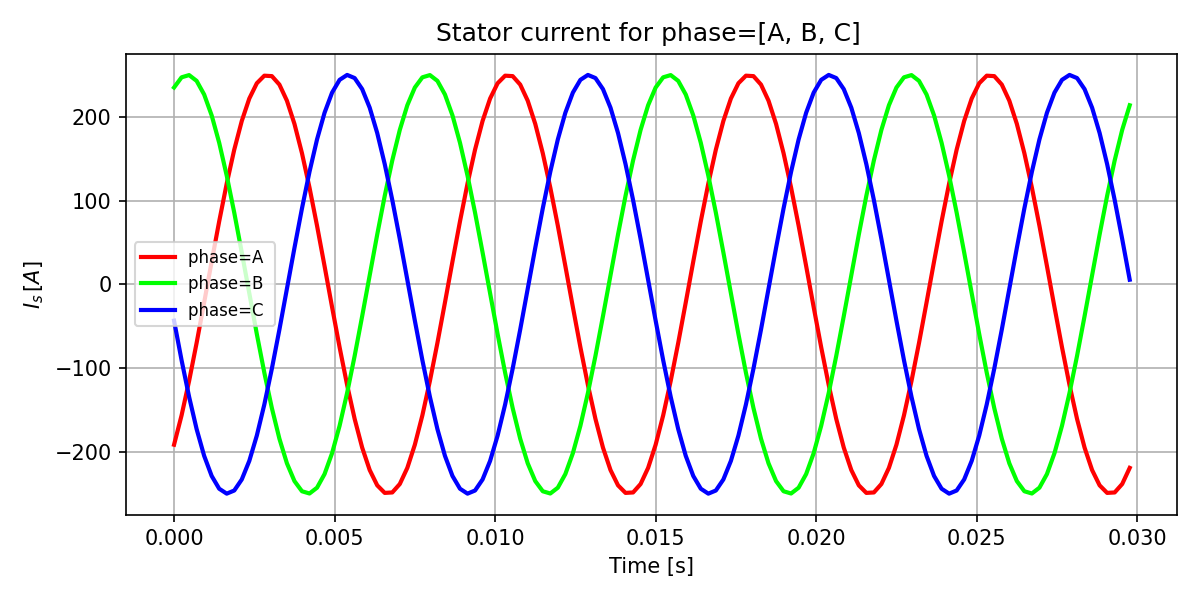

In [13]:
# Plot the flux
out_op.mag.B.plot_2D_Data("angle", **dict_2D)
# Plot the torque
out_op.mag.Tem.plot_2D_Data("time", **dict_2D)
# Plot the current
out_op.elec.get_Is().plot_2D_Data("time", "phase[]", **dict_2D)

작동 지점은 다음을 사용하여 I0 / Phi0으로 직접 정의할 수도 있습니다.

In [14]:
from numpy import pi

simu_op.input.OP.set_I0_Phi0(I0=I0_rms, Phi0=Phi0)
simu_op.input.OP.get_Id_Iq()

{'Id': -135.4188051049254, 'Iq': 113.62986941801093}

## 여러 운전 지점에서 반복

각 pyleecan 시뮬레이션은 준정적이며 단일 작동 지점(고정 속도)에서 실행되는 것으로 가정합니다. 여러 작동 지점에서 시뮬레이션을 실행하려면 두 단계가 필요합니다. 먼저 단일 작동 지점(위에 정의된 것과 같은)에서 올바르게 실행되는 시뮬레이션을 정의한 다음 VarLoadCurrent 개체를 정의합니다.

VarLoadCurrent 개체는 각 행이 작동점에 해당하는 행렬로 정의되며 열은 다음과 같습니다.
- (N0, I0, Phi0) type_OP_matrix==0인 경우
- (N0, Id, Iq) type_OP_matrix==1인 경우

다음 VarLoadCurrent 개체는 Phi0 값을 변경하여 이전 시뮬레이션을 N_simu 번 실행합니다.

is_torque=True를 설정하여 네 번째 열을 추가할 수 있습니다. 작동점에 대한 기준 토크를 정의할 수 있습니다. 기준은 output.elec.Tem_av_ref에 저장되고 실제 계산된 토크는 output.mag.Tem_av에 저장됩니다.

기준 토크 및 현재 각도 벡터는 다음과 같습니다.

In [15]:
from numpy import linspace, array, pi

Tem_av_ref = array([79, 125, 160, 192, 237, 281, 319, 343, 353, 332, 266, 164, 22]) # Yang et al, 2013
Phi0_ref = linspace(60 * pi / 180, 180 * pi / 180, Tem_av_ref.size)
N_simu = Tem_av_ref.size

In [25]:
from pyleecan.Classes.VarLoadCurrent import VarLoadCurrent
from numpy import zeros, ones, linspace, array, sqrt, arange

varload = VarLoadCurrent(is_torque=True)
varload.type_OP_matrix = 0 # Matrix N0, I0, Phi0

# Creating the Operating point matrix
OP_matrix = zeros((N_simu,4))

# Set N0 = 2000 [rpm] for all simulation
OP_matrix[:,0] = 3000 * ones((N_simu))

# Set I0 = 250 / sqrt(2) [A] (RMS) for all simulation
OP_matrix[:,1] = I0_rms * ones((N_simu)) 

# Set Phi0 from 60° to 180°
OP_matrix[:,2] = Phi0_ref

# Set reference torque from Yang et al, 2013
OP_matrix[:,3] = Tem_av_ref

varload.OP_matrix = OP_matrix
print(OP_matrix)

# All the simulation use the same machine
# No need to draw the machine for all OP
varload.is_reuse_femm_file=True  

[[3.00000000e+03 1.76776695e+02 1.04719755e+00 7.90000000e+01]
 [3.00000000e+03 1.76776695e+02 1.22173048e+00 1.25000000e+02]
 [3.00000000e+03 1.76776695e+02 1.39626340e+00 1.60000000e+02]
 [3.00000000e+03 1.76776695e+02 1.57079633e+00 1.92000000e+02]
 [3.00000000e+03 1.76776695e+02 1.74532925e+00 2.37000000e+02]
 [3.00000000e+03 1.76776695e+02 1.91986218e+00 2.81000000e+02]
 [3.00000000e+03 1.76776695e+02 2.09439510e+00 3.19000000e+02]
 [3.00000000e+03 1.76776695e+02 2.26892803e+00 3.43000000e+02]
 [3.00000000e+03 1.76776695e+02 2.44346095e+00 3.53000000e+02]
 [3.00000000e+03 1.76776695e+02 2.61799388e+00 3.32000000e+02]
 [3.00000000e+03 1.76776695e+02 2.79252680e+00 2.66000000e+02]
 [3.00000000e+03 1.76776695e+02 2.96705973e+00 1.64000000e+02]
 [3.00000000e+03 1.76776695e+02 3.14159265e+00 2.20000000e+01]]


원래 시뮬레이션은 매트릭스에 따라 업데이트된 InputCurrent 값으로 N_simu 번 복제됩니다.

In [26]:
simu_vop = simu_op.copy()
simu_vop.var_simu = varload

# Speed-up computation (set reference simu as first OP)
simu_vop.input.set_OP_from_array(varload.OP_matrix, varload.type_OP_matrix)

Xout = simu_vop.run()

[23:47:34] Starting running simulation tuto_Id_Iq (machine=Toyota_Prius)
[23:47:34] Reference Operating point is not in OP_matrix, one extra simulation will be computed
[23:47:34] Computing reference simulation for Variable Load
[23:47:34] Starting Magnetic module
[23:47:34] Solving time step 9 / 16 in FEMM
[23:47:34] Solving time step 1 / 16 in FEMM
[23:47:35] Solving time step 13 / 16 in FEMM
[23:47:35] Solving time step 5 / 16 in FEMM
[23:47:35] Solving time step 2 / 16 in FEMM
[23:47:35] Solving time step 10 / 16 in FEMM
[23:47:35] Solving time step 14 / 16 in FEMM
[23:47:35] Solving time step 6 / 16 in FEMM
[23:47:36] Solving time step 3 / 16 in FEMM
[23:47:36] Solving time step 11 / 16 in FEMM
[23:47:36] Solving time step 15 / 16 in FEMM
[23:47:36] Solving time step 7 / 16 in FEMM
[23:47:36] Solving time step 4 / 16 in FEMM
[23:47:36] Solving time step 12 / 16 in FEMM
[23:47:36] Solving time step 16 / 16 in FEMM
[23:47:36] Solving time step 8 / 16 in FEMM
[23:47:37] Variable Load

[23:47:51] Solving time step 13 / 16 in FEMM
[23:47:51] Solving time step 5 / 16 in FEMM
[23:47:52] Solving time step 2 / 16 in FEMM
[23:47:52] Solving time step 10 / 16 in FEMM
[23:47:52] Solving time step 14 / 16 in FEMM
[23:47:52] Solving time step 6 / 16 in FEMM
[23:47:52] Solving time step 3 / 16 in FEMM
[23:47:52] Solving time step 11 / 16 in FEMM
[23:47:52] Solving time step 15 / 16 in FEMM
[23:47:52] Solving time step 7 / 16 in FEMM
[23:47:52] Solving time step 12 / 16 in FEMM
[23:47:53] Solving time step 4 / 16 in FEMM
[23:47:53] Solving time step 16 / 16 in FEMM
[23:47:53] Solving time step 8 / 16 in FEMM
[23:47:53] Variable Load Results: N0=3000 [rpm], Id=-88.39 [Arms], Iq=153.1 [Arms], I0=176.8 [A], Phi0=2.094 [], Tem_av=323.8 [N.m], Tem_rip_pp=80.18 [N.m], Tem_rip_norm=0.2476 [-], Pem_av=1.017e+05 [W]
[============================                      ]  57%
[23:47:53] Running simulation 8/13 with N0=3000 [rpm], Id=-113.6 [Arms], Iq=135.4 [Arms]
[23:47:53] Starting Magneti

Pyleecan will automatically extract some values from each simulation. These values are all gathered in the xoutput_dict:

In [28]:
print("Values available in XOutput:")
print(Xout.xoutput_dict.keys())

print("\nI0 for each simulation:")
print(Xout["I0"].result)
print("\nPhi0 for each simulation:")
print(Xout["Phi0"].result)

Values available in XOutput:
dict_keys(['N0', 'Id', 'Iq', 'I0', 'Phi0', 'Tem_av_ref', 'Tem_av', 'Tem_rip_pp', 'Tem_rip_norm', 'Pem_av'])

I0 for each simulation:
[176.77669529663686, 176.77669529663686, 176.77669529663683, 176.77669529663686, 176.77669529663683, 176.77669529663686, 176.77669529663686, 176.77669529663686, 176.77669529663686, 176.77669529663686, 176.77669529663683, 176.77669529663683, 176.77669529663686]

Phi0 for each simulation:
[1.0471975511965976, 1.2217304763960306, 1.3962634015954636, 1.5707963267948966, 1.7453292519943295, 1.9198621771937625, 2.0943951023931957, 2.2689280275926285, 2.443460952792061, 2.6179938779914944, 2.7925268031909276, 2.9670597283903604, 3.141592653589793]


Any parameter in the XOutput can be plot as a function of any other

<IPython.core.display.Javascript object>


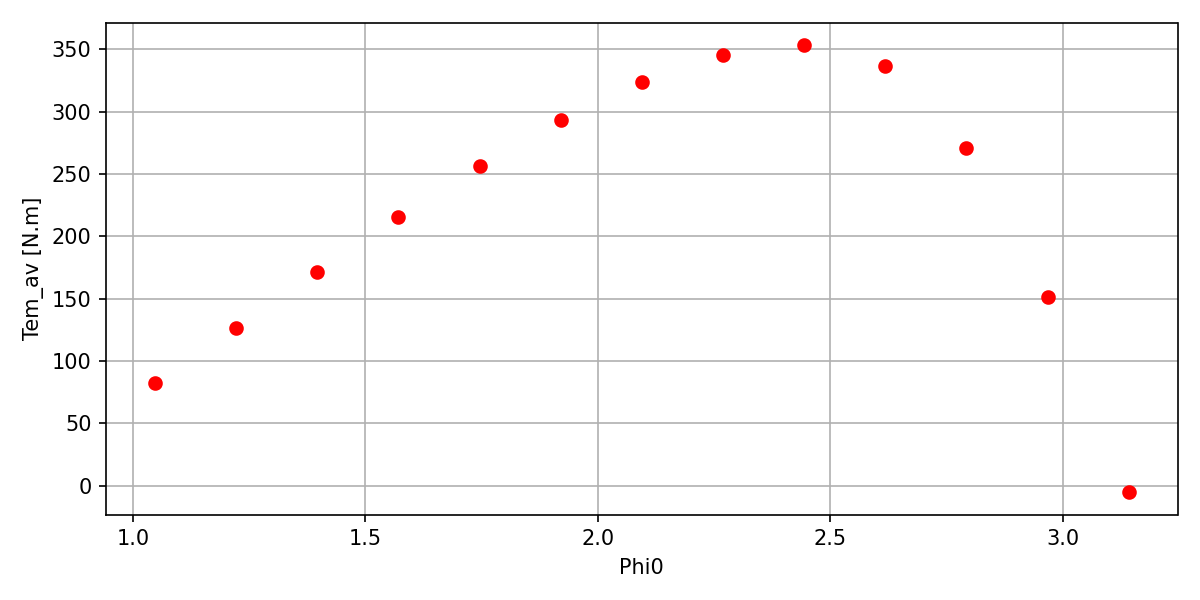

<IPython.core.display.Javascript object>


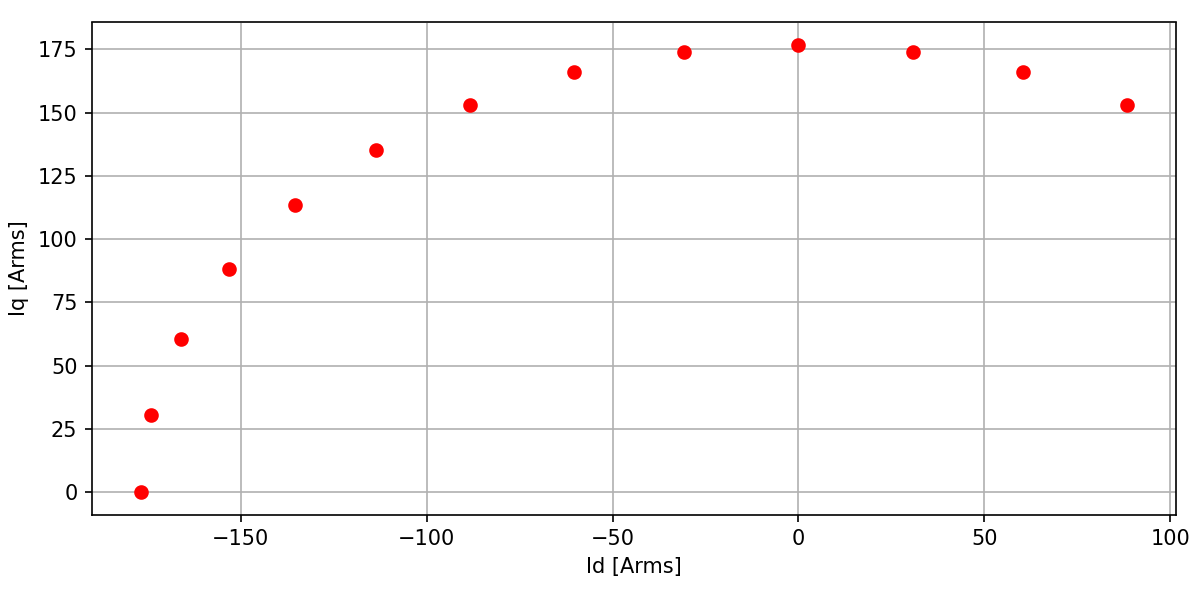

In [29]:
fig = Xout.plot_multi("Phi0", "Tem_av")
fig = Xout.plot_multi("Id", "Iq")

Finally, the computed average torque can be compared to the one in the publication from Yang et al (data has been extracted from their graph using [Engauge Digitizer](http://markummitchell.github.io/engauge-digitizer/). Note that the generic plot function `plot_2D` has been used here.

<IPython.core.display.Javascript object>


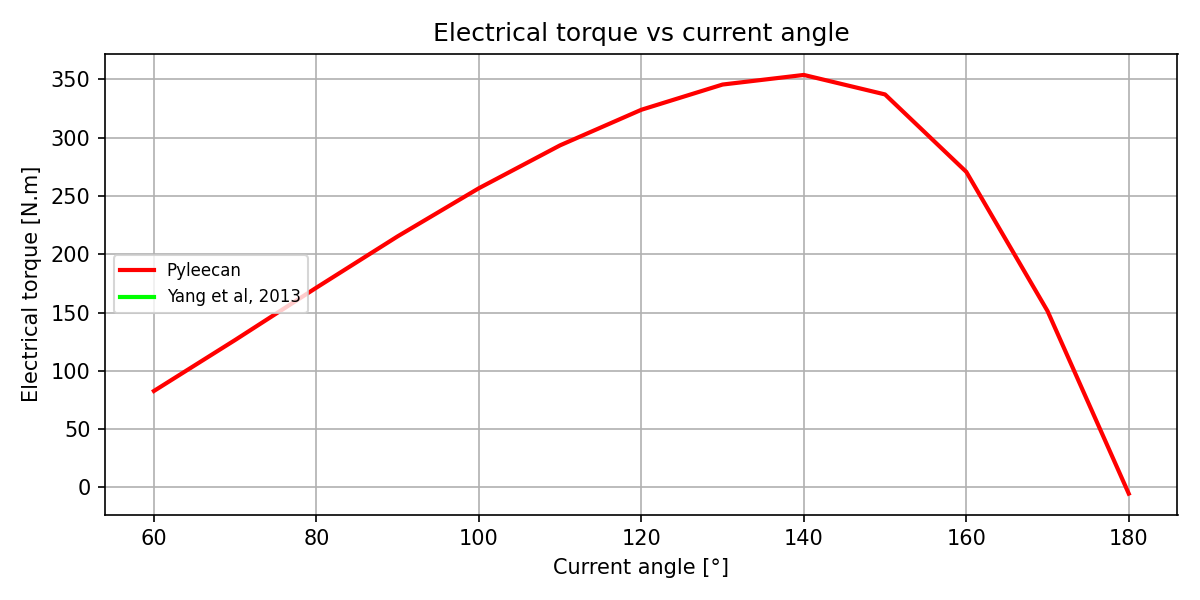

In [27]:
from SciDataTool.Functions.Plot.plot_2D import plot_2D
from pyleecan.definitions import config_dict
from numpy import array

plot_2D(
    array([x*180/pi for x in Xout.xoutput_dict["Phi0"].result]),
    [Xout.xoutput_dict["Tem_av"].result, Xout.xoutput_dict["Tem_av_ref"].result],
    legend_list=["Pyleecan", "Yang et al, 2013"],
    xlabel="Current angle [°]",
    ylabel="Electrical torque [N.m]",
    title="Electrical torque vs current angle",
    **dict_2D
)